In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline



# Problem Statement

For our first project, we're going to take a look at SAT and ACT scores around the United States. Suppose that the College Board - the organization that administers the SAT - seeks to improve the participation rate of its exams. Your presentation should be geared toward **non-technical** executives with the College Board and you will use, at minimum, the provided data to make recommendations about how the College Board might work to increase the participation rates of these exams.

##### Loading the data in using pandas.

In [220]:
sat_data = pd.read_csv('../data/sat.csv',index_col=0)
act_data = pd.read_csv('../data/act.csv',index_col=0)

In [221]:
# Making a copy to preserve the state of the original data
df_sat = sat_data
df_act = act_data

##### Reviewing the data

In [222]:
df_sat.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [223]:
df_act[0:10]

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


##### Describing the features of each data frame

act_data:  
> - State - location where the data was sampled
> - Participation - participation rate
> - English, Math, Reading, Science - scores for these categories
> - Composite - avg of all categories
  
sat_data:
> - State - location where the data was sampled
> - Participation - participation rate
> - Evidence Base Reading and Writing - score for this category
> - Math - score for this category
> - Total - sum of the cateogry scores


##### Observations with the data setss

> - Low participation rates in both data sets do not seem like a good representation of the populations' score.
> - act scores are floats 
> - sat sores are integers
> - participation rates for both sets are objects
> - act has 51 rows and sat has 52 rows

In [224]:
print(df_sat.info())
print('-'*50)
print(df_act.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.4+ KB
None
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), object(2)
memory usage: 3.2+ KB
None


##### Looking at the features

In [225]:
print('SAT Data '),
print(df_sat.dtypes)
print('-'*50)
print('ACT Data')
print(df_act.dtypes)

SAT Data 
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object
--------------------------------------------------
ACT Data
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


##### Changing data types of some of the features

In [226]:
#converting int64 datatypes in SAT scores to a float
df_sat['Total'] = df_sat['Total'].astype(float)
df_sat['Math'] = df_sat['Math'].astype(float)

#Change Long title to something shorter
df_sat.rename(index=str, columns={"Evidence-Based Reading and Writing":"Read_Writing"},inplace=True)

In [227]:
df_sat['Read_Writing'] = df_sat['Read_Writing'].astype(float)

In [228]:
df_sat.dtypes

State             object
Participation     object
Read_Writing     float64
Math             float64
Total            float64
dtype: object

In [229]:
df_sat.head(3)

,State,Participation,Read_Writing,Math,Total
0,Alabama,5%,593.0,572.0,1165.0
1,Alaska,38%,547.0,533.0,1080.0
2,Arizona,30%,563.0,553.0,1116.0


In [230]:
#Removing the % sign and converting Object to an Int 
df_sat['Participation'] = df_sat['Participation'].str.replace('%', '').astype(int)
df_act['Participation'] = df_act['Participation'].str.replace('%', '').astype(int)

In [231]:
df_sat.head(3)

,State,Participation,Read_Writing,Math,Total
0,Alabama,5,593.0,572.0,1165.0
1,Alaska,38,547.0,533.0,1080.0
2,Arizona,30,563.0,553.0,1116.0


In [232]:
#Dividing the integers to make them into decimals
df_sat['Participation'] = df_sat['Participation'].div(100)
df_act['Participation'] = df_act['Participation'].div(100)

In [233]:
#Verification of the data type change for Partcipation to int64

print('ACT '),
print(df_act.dtypes)
print('-'*50)
print('SAT')
print(df_sat.dtypes)

ACT 
State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object
--------------------------------------------------
SAT
State             object
Participation    float64
Read_Writing     float64
Math             float64
Total            float64
dtype: object


In [234]:
df_sat.head()

,State,Participation,Read_Writing,Math,Total
0,Alabama,0.05,593.0,572.0,1165.0
1,Alaska,0.38,547.0,533.0,1080.0
2,Arizona,0.30,563.0,553.0,1116.0
3,Arkansas,0.03,614.0,594.0,1208.0
4,California,0.53,531.0,524.0,1055.0


In [235]:
df_act.tail(5)

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,0.29,23.5,23.3,24.6,23.5,23.8
48,Washington,0.29,20.9,21.9,22.1,22.0,21.9
49,West Virginia,0.69,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,1.00,19.7,20.4,20.6,20.9,20.5
51,Wyoming,1.00,19.4,19.8,20.8,20.6,20.2


##### Creating a dictionaries of each states scores for each assessment category

In [236]:
def thaDictMaka(df, key, value):
    thaDict = {}
    for row in range(len(df)):
        thaDict[df[key].iloc[row]] = df[value].iloc[row]
    return(thaDict)

In [237]:
# SAT 
satd_r=thaDictMaka(df_sat, 'State', 'Read_Writing')
satd_m=thaDictMaka(df_sat, 'State', 'Math')
satd_t=thaDictMaka(df_sat, 'State', 'Total')

actd_e=thaDictMaka(df_act, 'State', 'English')
actd_m=thaDictMaka(df_act, 'State', 'Math')
actd_r=thaDictMaka(df_act, 'State', 'Reading')
actd_s=thaDictMaka(df_act, 'State', 'Science')
actd_c=thaDictMaka(df_act, 'State', 'Composite')

In [238]:
# SAT read_writing scores by state
satd_r

{'Alabama': 593.0,
 'Alaska': 547.0,
 'Arizona': 563.0,
 'Arkansas': 614.0,
 'California': 531.0,
 'Colorado': 606.0,
 'Connecticut': 530.0,
 'Delaware': 503.0,
 'District of Columbia': 482.0,
 'Florida': 520.0,
 'Georgia': 535.0,
 'Hawaii': 544.0,
 'Idaho': 513.0,
 'Illinois': 559.0,
 'Indiana': 542.0,
 'Iowa': 641.0,
 'Kansas': 632.0,
 'Kentucky': 631.0,
 'Louisiana': 611.0,
 'Maine': 513.0,
 'Maryland': 536.0,
 'Massachusetts': 555.0,
 'Michigan': 509.0,
 'Minnesota': 644.0,
 'Mississippi': 634.0,
 'Missouri': 640.0,
 'Montana': 605.0,
 'Nebraska': 629.0,
 'Nevada': 563.0,
 'New Hampshire': 532.0,
 'New Jersey': 530.0,
 'New Mexico': 577.0,
 'New York': 528.0,
 'North Carolina': 546.0,
 'North Dakota': 635.0,
 'Ohio': 578.0,
 'Oklahoma': 530.0,
 'Oregon': 560.0,
 'Pennsylvania': 540.0,
 'Rhode Island': 539.0,
 'South Carolina': 543.0,
 'South Dakota': 612.0,
 'Tennessee': 623.0,
 'Texas': 513.0,
 'Utah': 624.0,
 'Vermont': 562.0,
 'Virginia': 561.0,
 'Washington': 541.0,
 'West Virg

##### Creating dictionaries where each key is the column name, and each value is an array of all values in that column

In [239]:
def col_dict(df):
    col_dict = {}
    for i in df.columns:
        col_dict[i] = [df[i]]
        
    return col_dict

In [240]:
s_col_d = col_dict(df_sat)
a_col_d = col_dict(df_act)

In [241]:
a_col_d

{'Composite': [0     21.0
  1     19.2
  2     19.8
  3     19.7
  4     19.4
  5     22.8
  6     20.8
  7     25.2
  8     24.1
  9     24.2
  10    19.8
  11    21.4
  12    19.0
  13    22.3
  14    21.4
  15    22.6
  16    21.9
  17    21.7
  18    20.0
  19    19.5
  20    24.3
  21    23.6
  22    25.4
  23    24.1
  24    21.5
  25    18.6
  26    20.4
  27    20.3
  28    21.4
  29    17.8
  30    25.5
  31    23.9
  32    19.7
  33    24.2
  34    19.1
  35    20.3
  36    22.0
  37    19.4
  38    21.8
  39    23.7
  40    24.0
  41    18.7
  42    21.8
  43    19.8
  44    20.7
  45    20.3
  46    23.6
  47    23.8
  48    21.9
  49    20.4
  50    20.5
  51    20.2
  Name: Composite, dtype: float64], 'English': [0     20.3
  1     18.9
  2     18.7
  3     18.6
  4     18.9
  5     22.5
  6     20.1
  7     25.5
  8     24.1
  9     24.4
  10    19.0
  11    21.0
  12    17.8
  13    21.9
  14    21.0
  15    22.0
  16    21.2
  17    21.1
  18    19.6
  19    19.4
  20 

##### Merging the SAT and ACT dataframes on 'State'

In [242]:
# performing a join; inner is the default if not designated
merge_data = pd.merge(df_sat,df_act,on='State')
merge_data.head()

,State,Participation_x,Read_Writing,Math_x,Total,Participation_y,English,Math_y,Reading,Science,Composite
0,Alabama,0.05,593.0,572.0,1165.0,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547.0,533.0,1080.0,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563.0,553.0,1116.0,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614.0,594.0,1208.0,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531.0,524.0,1055.0,0.31,22.5,22.7,23.1,22.2,22.8


##### Changing the names of the columns so you can distinguish between the SAT columns and the ACT columns

In [243]:
merge_data.rename(index=str, columns={'Participation_x':'SAT_Participation',
                                      'Read_Writing':'SAT_ReadWrite',
                                      'Math_x':'SAT_Math',
                                      'Total':'SAT_Total',
                                      'Participation_y':'ACT_Participation',
                                      'English':'ACT_English',
                                      'Math_y':'ACT_Math',
                                      'Reading':'ACT_Reading',
                                      'Science':'ACT_Science',
                                      'Composite':'ACT_Composite'},inplace=True)

In [244]:
merge_data.head()

,State,SAT_Participation,SAT_ReadWrite,SAT_Math,SAT_Total,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite
0,Alabama,0.05,593.0,572.0,1165.0,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547.0,533.0,1080.0,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563.0,553.0,1116.0,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614.0,594.0,1208.0,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531.0,524.0,1055.0,0.31,22.5,22.7,23.1,22.2,22.8


##### Printing the minimum and maximum of each numeric column in the data frame

In [245]:
# Indexed [1:] to only show numerical values and not the max of objects
print('MAX \n{}\n MIN \n{}'.format(merge_data.max()[1:],merge_data.min()[1:]))

MAX 
SAT_Participation       1
SAT_ReadWrite         644
SAT_Math              651
SAT_Total            1295
ACT_Participation       1
ACT_English          25.5
ACT_Math             25.3
ACT_Reading            26
ACT_Science          24.9
ACT_Composite        25.5
dtype: object
 MIN 
SAT_Participation    0.02
SAT_ReadWrite         482
SAT_Math               52
SAT_Total             950
ACT_Participation    0.08
ACT_English          16.3
ACT_Math               18
ACT_Reading          18.1
ACT_Science           2.3
ACT_Composite        17.8
dtype: object


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [246]:
merge_data.dtypes

State                 object
SAT_Participation    float64
SAT_ReadWrite        float64
SAT_Math             float64
SAT_Total            float64
ACT_Participation    float64
ACT_English          float64
ACT_Math             float64
ACT_Reading          float64
ACT_Science          float64
ACT_Composite        float64
dtype: object

In [247]:
def mySTDs(df):
    return [ np.around(df[col].std(),2) for col in 
        df.select_dtypes(include = ['float', 'int']).columns.tolist()[:] ]

In [248]:
mySTDs(merge_data)

[0.35, 45.67, 84.91, 92.49, 0.32, 2.35, 1.98, 2.07, 3.18, 2.02]

In [249]:
sd = mySTDs(merge_data)

In [250]:
sd

[0.35, 45.67, 84.91, 92.49, 0.32, 2.35, 1.98, 2.07, 3.18, 2.02]

In [251]:
len(sd)

10

## Manipulating the dataframe

##### Turning the list `sd` into a new observation in your dataset.

In [258]:
# Starting a single item list with National STD (this will be in the 'State' column)
sd_observation = ['National STD']

# appending the corresponding stds for each column in the data frame
for i in sd:
    sd_observation.append(i)
    
sd_observation

['National STD', 0.35, 45.67, 84.91, 92.49, 0.32, 2.35, 1.98, 2.07, 3.18, 2.02]

In [263]:
# Adding STD data to the bottom of the DataFrame
merge_data.loc[52] = sd_observation

merge_data.tail(2)

,State,SAT_Participation,SAT_ReadWrite,SAT_Math,SAT_Total,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite
50,Wyoming,0.03,626.00,604.00,1230.00,1.00,19.40,19.80,20.80,20.60,20.20
52,National STD,0.35,45.67,84.91,92.49,0.32,2.35,1.98,2.07,3.18,2.02


In [267]:
# Top 10 SAT Participation States
merge_data.sort_values('SAT_Participation', ascending=False).head(10)

,State,SAT_Participation,SAT_ReadWrite,SAT_Math,SAT_Total,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite
22,Michigan,1.00,509.0,495.0,1005.0,0.29,24.1,23.7,24.5,23.8,24.1
6,Connecticut,1.00,530.0,512.0,1041.0,0.31,25.5,24.6,25.6,24.6,25.2
7,Delaware,1.00,503.0,492.0,996.0,0.18,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,1.00,482.0,468.0,950.0,0.32,24.4,23.5,24.9,23.5,24.2
29,New Hampshire,0.96,532.0,520.0,1052.0,0.18,25.4,25.1,26.0,24.9,25.5
19,Maine,0.95,513.0,499.0,1012.0,0.08,24.2,24.0,24.8,23.7,24.3
12,Idaho,0.93,513.0,493.0,1005.0,0.38,21.9,21.8,23.0,22.1,22.3
9,Florida,0.83,520.0,497.0,1017.0,0.73,19.0,19.4,21.0,19.4,19.8
21,Massachusetts,0.76,555.0,551.0,1107.0,0.29,25.4,25.3,25.9,24.7,25.4
39,Rhode Island,0.71,539.0,524.0,1062.0,0.21,24.0,23.3,24.7,23.4,24.0


In [269]:
# Top 10 ACT Participation States
merge_data.sort_values('ACT_Participation', ascending=False).head(10)

,State,SAT_Participation,SAT_ReadWrite,SAT_Math,SAT_Total,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite
0,Alabama,0.05,593.0,572.0,1165.0,1.0,18.9,18.4,19.7,19.4,19.2
17,Kentucky,0.04,631.0,616.0,1247.0,1.0,19.6,19.4,20.5,20.1,20.0
50,Wyoming,0.03,626.0,604.0,1230.0,1.0,19.4,19.8,20.8,20.6,20.2
49,Wisconsin,0.03,642.0,649.0,1291.0,1.0,19.7,20.4,20.6,20.9,20.5
44,Utah,0.03,624.0,614.0,1238.0,1.0,19.5,19.9,20.8,20.6,20.3
42,Tennessee,0.05,623.0,604.0,1228.0,1.0,19.5,19.2,20.1,19.9,19.8
40,South Carolina,0.50,543.0,521.0,1064.0,1.0,17.5,18.6,19.1,18.9,18.7
36,Oklahoma,0.07,530.0,517.0,1047.0,1.0,18.5,18.8,20.1,19.6,19.4
33,North Carolina,0.49,546.0,535.0,1081.0,1.0,17.8,19.3,19.6,19.3,19.1
28,Nevada,0.26,563.0,553.0,1116.0,1.0,16.3,18.0,18.1,18.2,17.8


##### ACT Participation rate above 50%

In [272]:
# Number of states with an ACT participation rate above 50%
print(len(merge_data[ merge_data['ACT_Participation']>=0.5 ]))

31


## Visualizing the data

##### Used MatPlotLib and PyPlot to plot the distribution of the Rate columns for both SAT and ACT using histograms

In [273]:
# Making a new variable for plotting the histograms with National STD row removed
merge_data_hist = merge_data.iloc[:51,:]

In [274]:
merge_data_hist.head()

,State,SAT_Participation,SAT_ReadWrite,SAT_Math,SAT_Total,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite
0,Alabama,0.05,593.0,572.0,1165.0,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547.0,533.0,1080.0,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563.0,553.0,1116.0,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614.0,594.0,1208.0,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531.0,524.0,1055.0,0.31,22.5,22.7,23.1,22.2,22.8


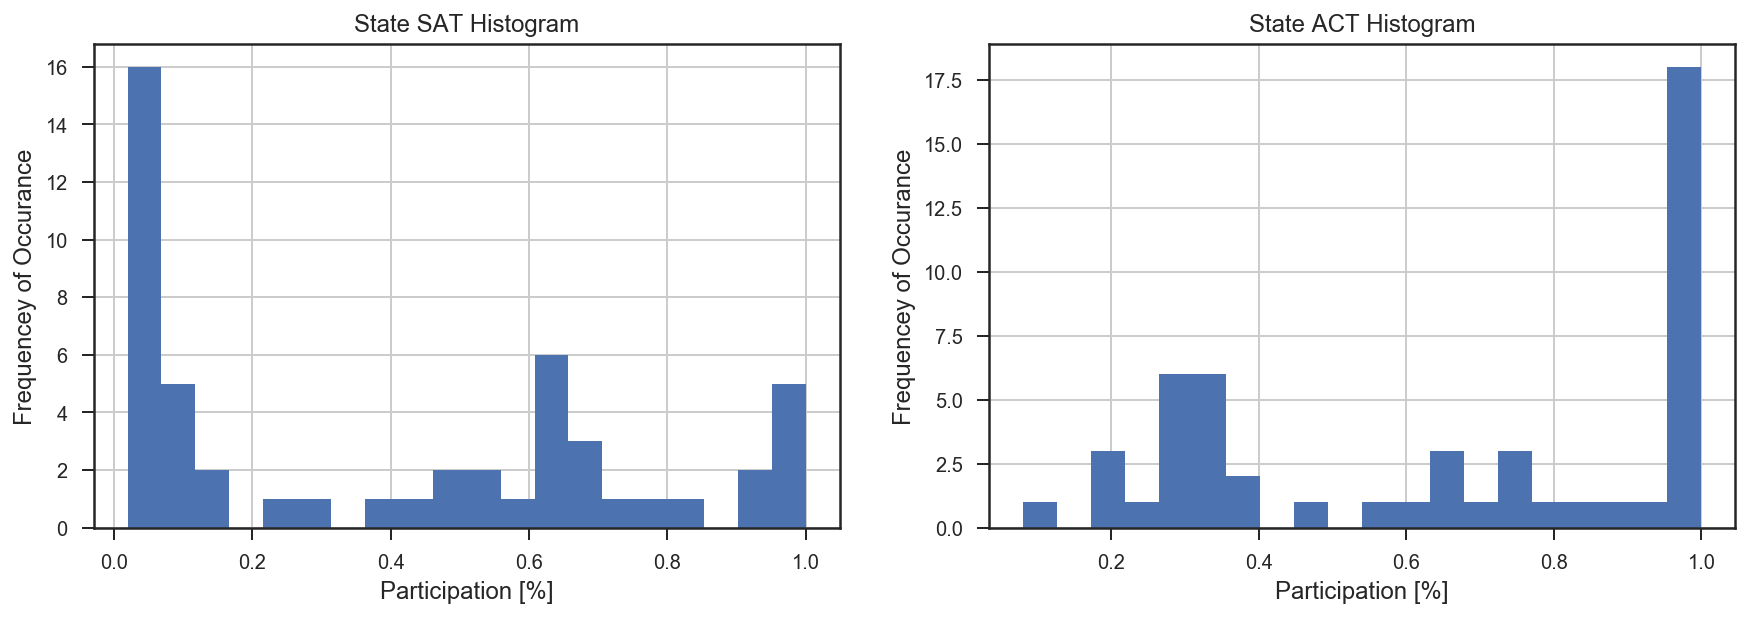

In [275]:
plt.figure(1)

plt.subplot(121)
plt.hist(merge_data_hist['SAT_Participation'], 20)
plt.xlabel('Participation [%]', fontsize='large')
plt.ylabel('Frequencey of Occurance', fontsize='large')
plt.title('State SAT Histogram')
plt.grid(True)

plt.subplot(122)
plt.hist(merge_data_hist['ACT_Participation'], 20)
plt.xlabel('Participation [%]', fontsize='large')
plt.ylabel('Frequencey of Occurance', fontsize='large')
plt.title('State ACT Histogram')
plt.grid(True)

plt.subplots_adjust(top=0.92, bottom=.08, left=.10, right=2, hspace=0.6,
                    wspace=0.2)

##### Plotting the Math(s) distributions from both data sets.

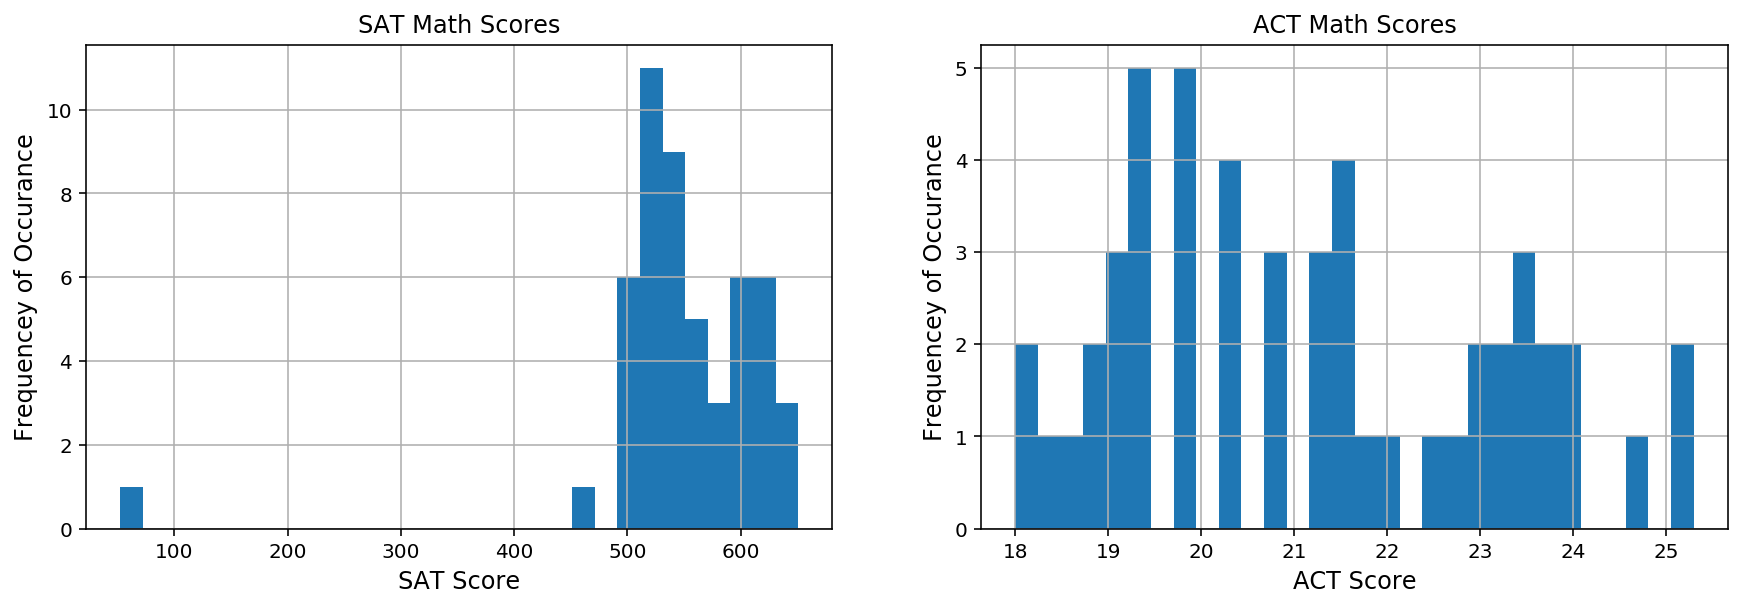

In [53]:

plt.figure(1)

plt.subplot(121)
plt.hist(merge_data_hist['SAT_Math'], 30)
plt.xlabel('SAT Score', fontsize='large')
plt.ylabel('Frequencey of Occurance', fontsize='large')
plt.title('SAT Math Scores')
plt.grid(True)

plt.subplot(122)
plt.hist(merge_data_hist['ACT_Math'], 30)
plt.xlabel('ACT Score', fontsize='large')
plt.ylabel('Frequencey of Occurance', fontsize='large')
plt.title('ACT Math Scores')
plt.grid(True)



plt.subplots_adjust(top=0.92, bottom=.08, left=.10, right=2, hspace=0.6,
                    wspace=0.2)

##### Plotting the Verbal distributions from both data sets.

In [54]:
merge_data[:0]

,State,SAT_Participation,SAT_ReadWrite,SAT_Math,SAT_Total,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite


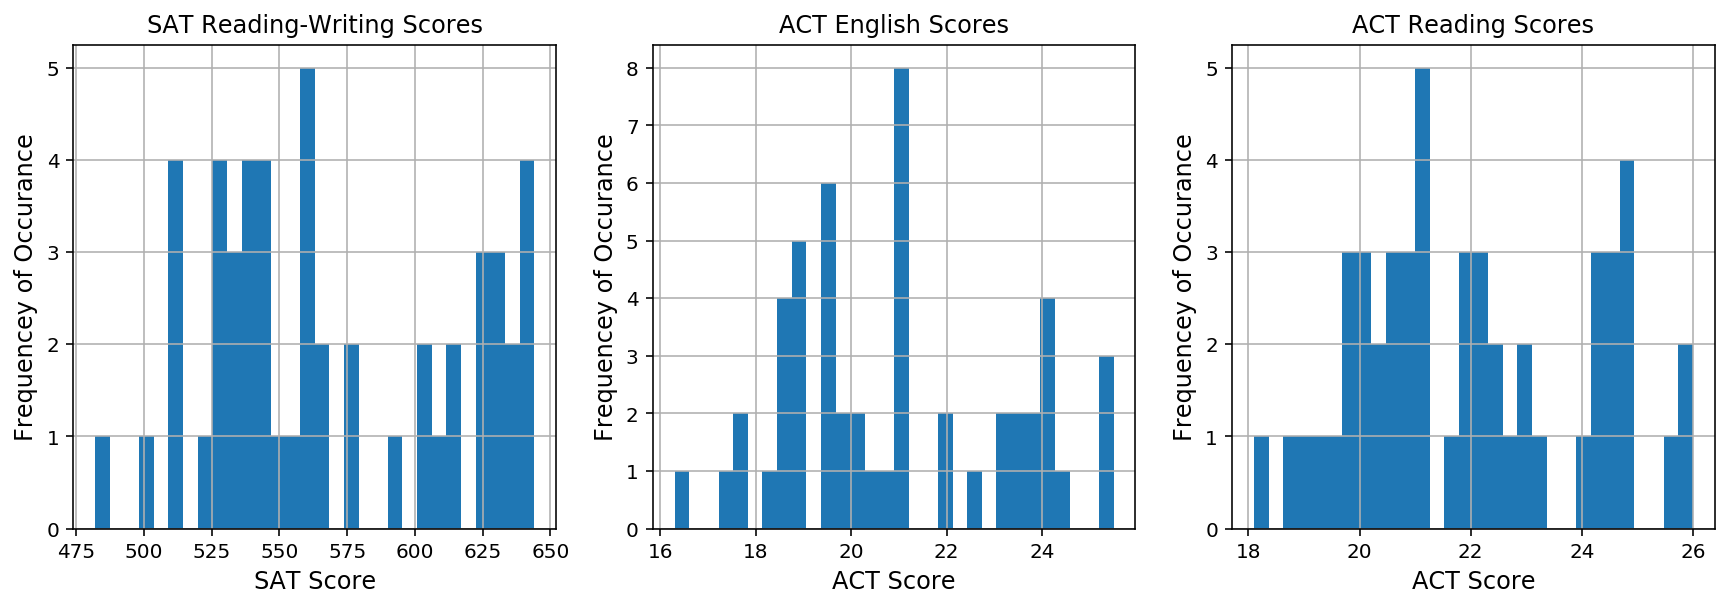

In [55]:
plt.figure(1)

plt.subplot(131)
plt.hist(merge_data_hist['SAT_ReadWrite'], 30)
plt.xlabel('SAT Score', fontsize='large')
plt.ylabel('Frequencey of Occurance', fontsize='large')
plt.title('SAT Reading-Writing Scores')
plt.grid(True)

plt.subplot(132)
plt.hist(merge_data_hist['ACT_English'], 30)
plt.xlabel('ACT Score', fontsize='large')
plt.ylabel('Frequencey of Occurance', fontsize='large')
plt.title('ACT English Scores')
plt.grid(True)

plt.subplot(133)
plt.hist(merge_data_hist['ACT_Reading'], 30)
plt.xlabel('ACT Score', fontsize='large')
plt.ylabel('Frequencey of Occurance', fontsize='large')
plt.title('ACT Reading Scores')
plt.grid(True)


plt.subplots_adjust(top=0.92, bottom=.08, left=.10, right=2, hspace=0.6,
                    wspace=0.2)

##### Plotting some scatterplots examining relationships between all variables.

In [56]:
import seaborn as sns ;sns.set(style="ticks", color_codes=True)

In [284]:
merge_data_hist[merge_data_hist['SAT_Math']<200]

,State,SAT_Participation,SAT_ReadWrite,SAT_Math,SAT_Total,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite
20,Maryland,0.69,536.0,52.0,1060.0,0.28,23.3,23.1,24.2,2.3,23.6


In [324]:
merge_data_hist.drop(index=merge_data_hist.index[20], axis=0)

,State,SAT_Participation,SAT_ReadWrite,SAT_Math,SAT_Total,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite
0,Alabama,0.05,593.0,572.0,1165.0,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547.0,533.0,1080.0,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563.0,553.0,1116.0,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614.0,594.0,1208.0,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531.0,524.0,1055.0,0.31,22.5,22.7,23.1,22.2,22.8
5,Colorado,0.11,606.0,595.0,1201.0,1.00,20.1,20.3,21.2,20.9,20.8
6,Connecticut,1.00,530.0,512.0,1041.0,0.31,25.5,24.6,25.6,24.6,25.2
7,Delaware,1.00,503.0,492.0,996.0,0.18,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,1.00,482.0,468.0,950.0,0.32,24.4,23.5,24.9,23.5,24.2
9,Florida,0.83,520.0,497.0,1017.0,0.73,19.0,19.4,21.0,19.4,19.8


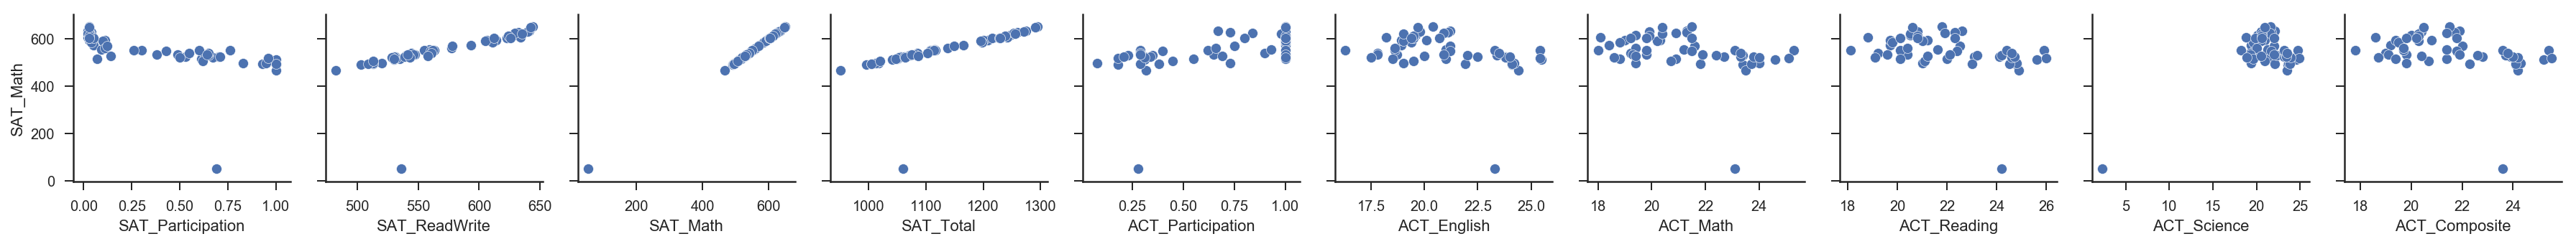

In [285]:
# need to replot with out Maryland whose SAT_Math scores may be a data error
relate = sns.pairplot(merge_data_hist, 
             x_vars=merge_data_hist.select_dtypes(exclude='object').columns.tolist(),
             y_vars=['SAT_Math'])

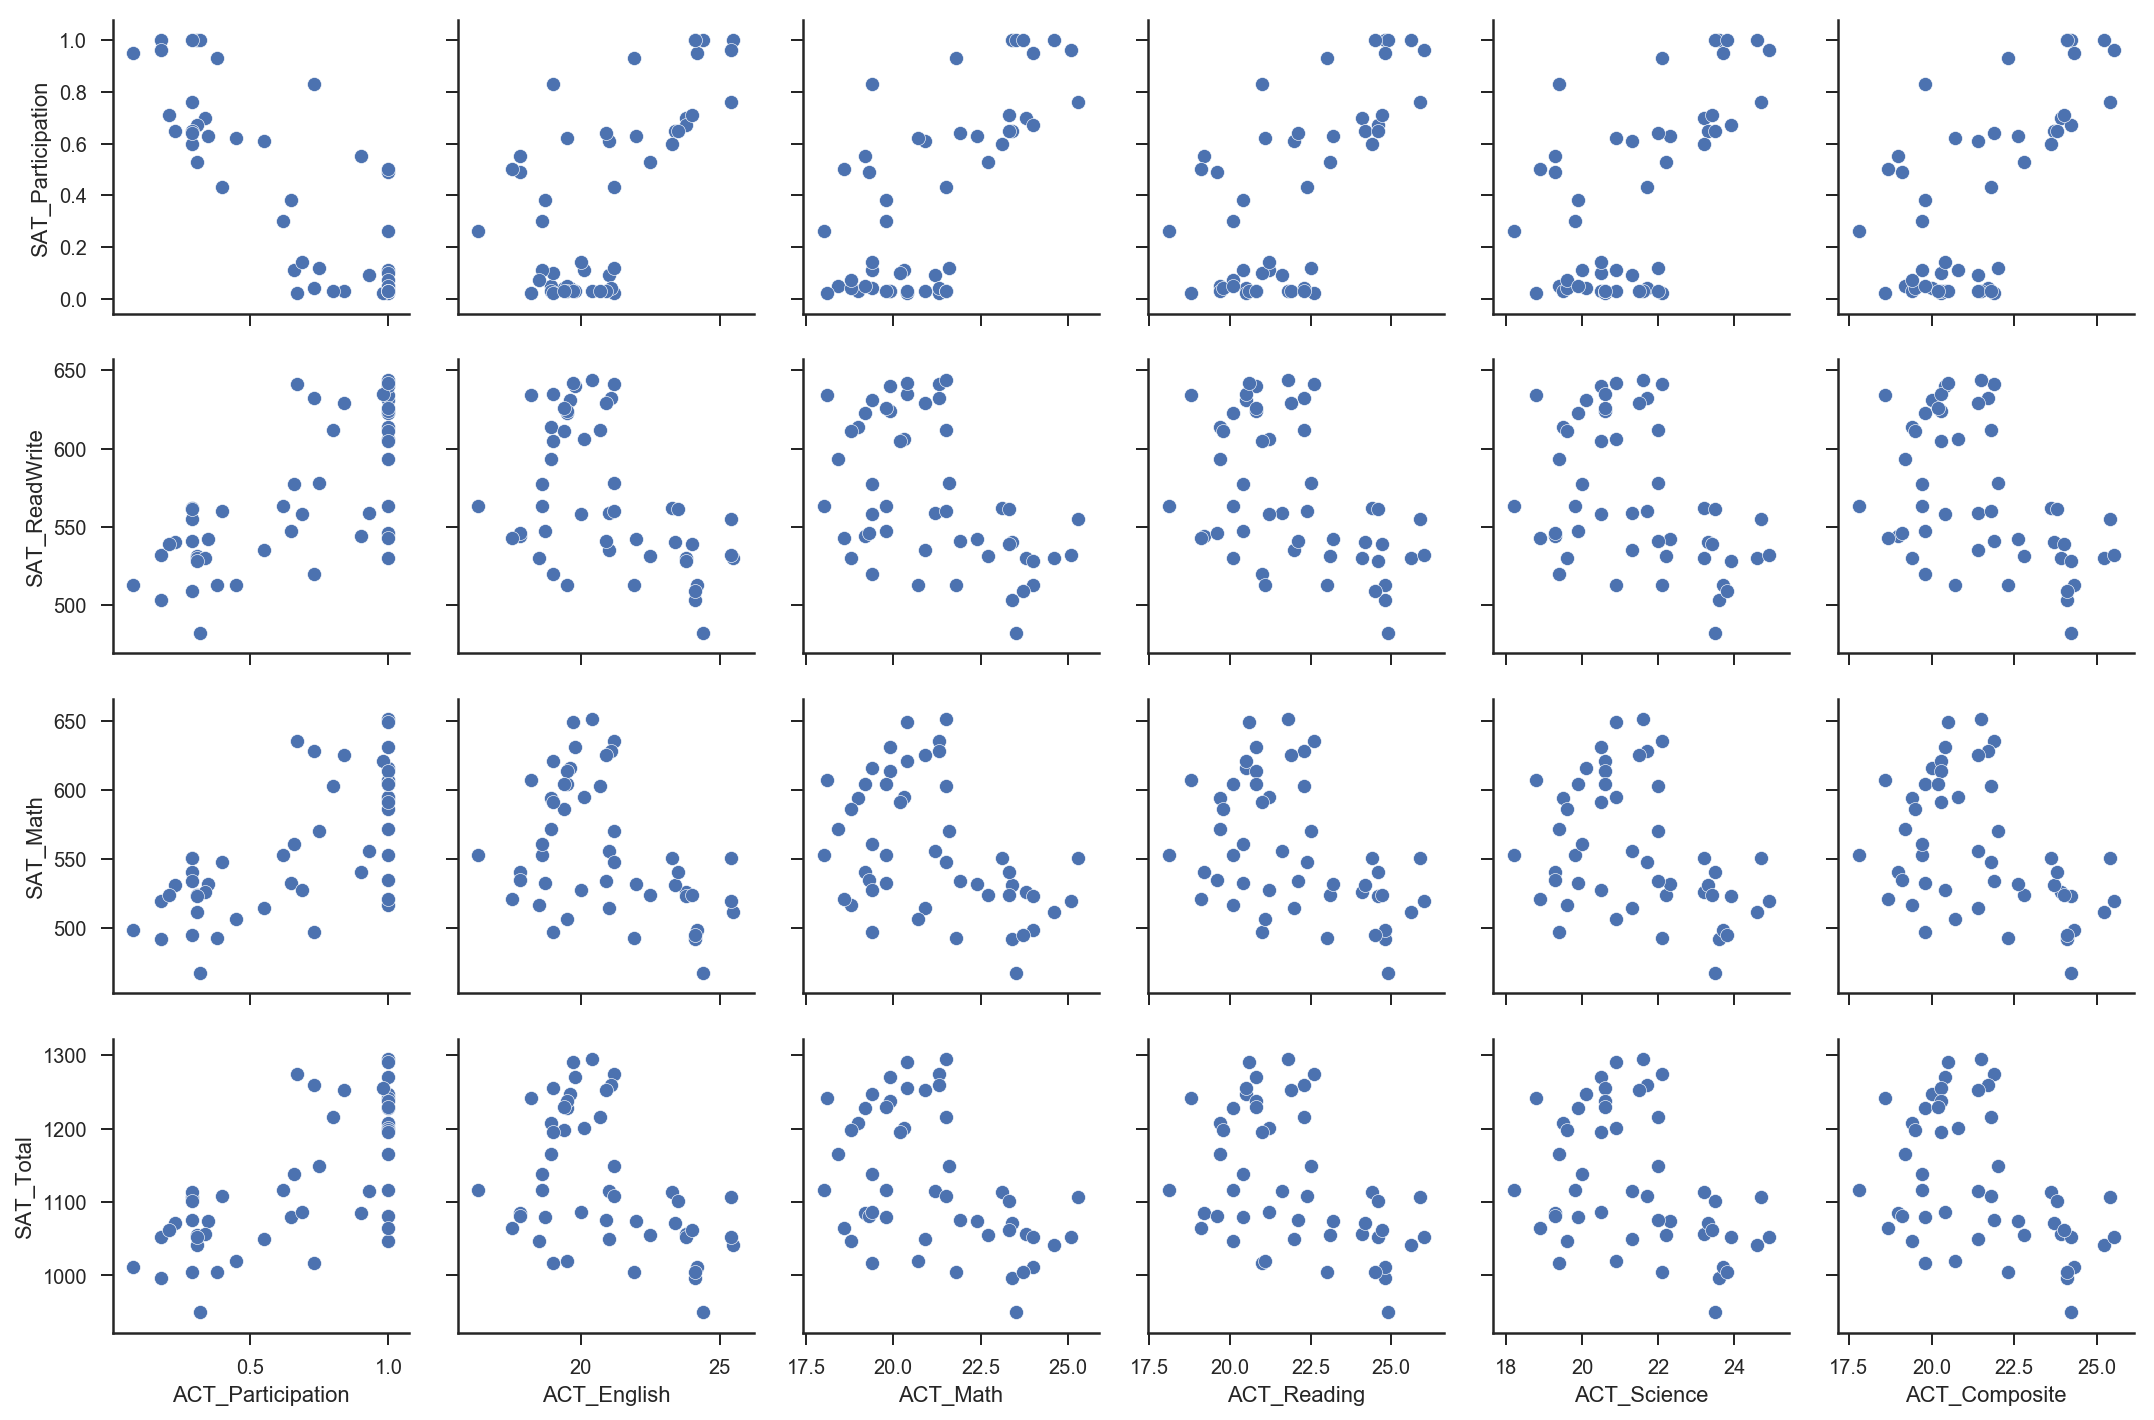

In [338]:
# SAT columns on left side and ACT columns on the bottom
relate = sns.pairplot(merge_data_hist.drop(index=merge_data_hist.index[20], axis=0), 
             x_vars=merge_data_hist.drop(index=merge_data_hist.index[20], axis=0)\
                      .select_dtypes(exclude='object').columns.tolist()[4:],
             y_vars=['SAT_Participation','SAT_ReadWrite','SAT_Math', 'SAT_Total'])


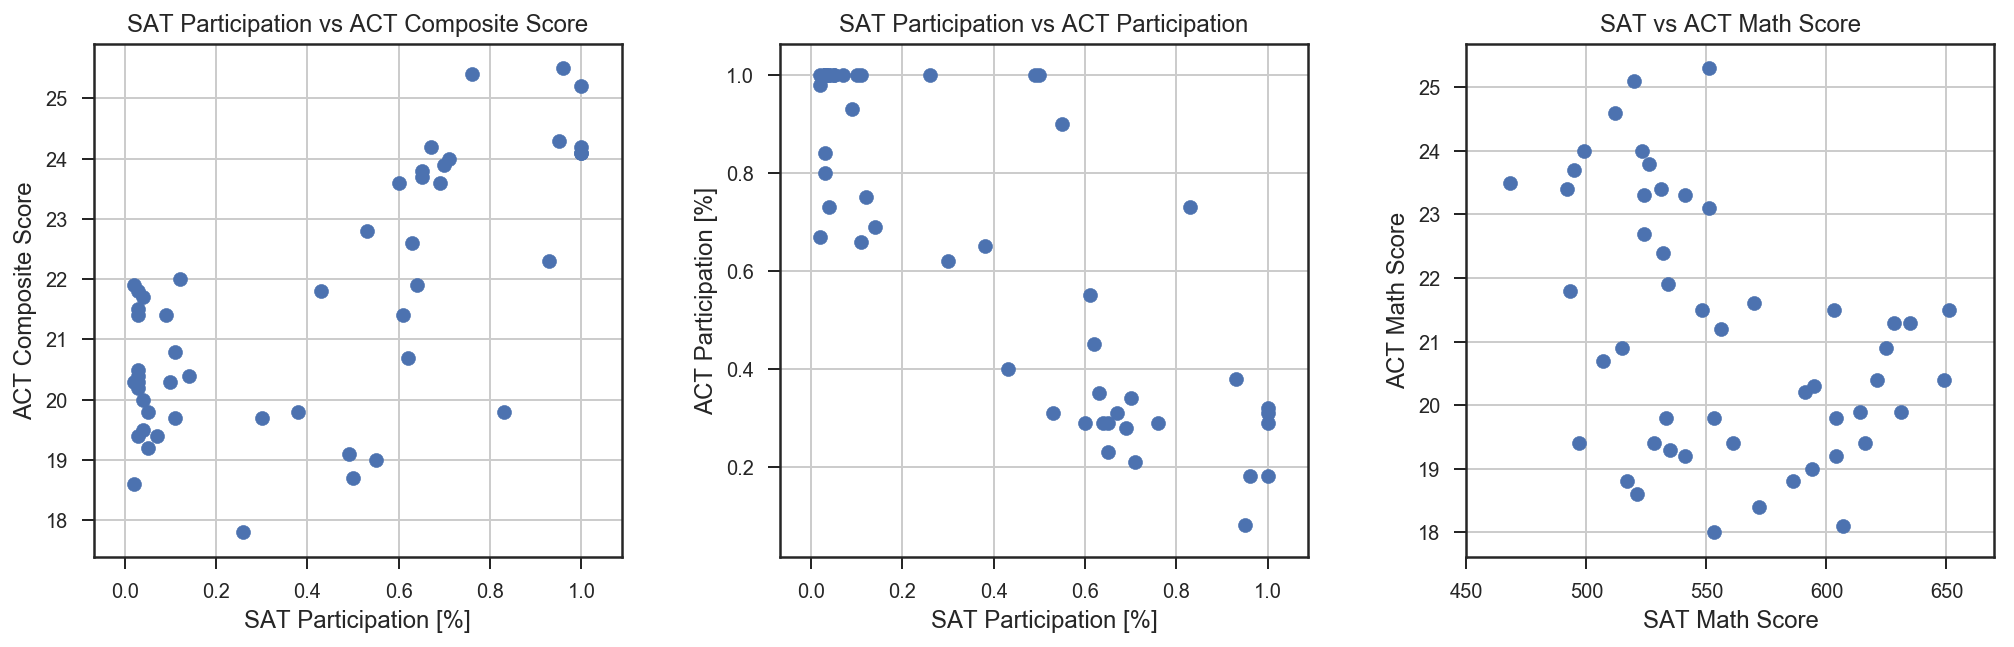

In [327]:
plt.figure(1)

plt.subplot(131)
plt.scatter(merge_data_hist['SAT_Participation'],merge_data_hist['ACT_Composite'])
plt.xlabel('SAT Participation [%]', fontsize='large')
plt.ylabel('ACT Composite Score', fontsize='large')
plt.title('SAT Participation vs ACT Composite Score', fontsize='large')
plt.grid(True)

plt.subplot(132)
# sns.lmplot('SAT_Participation','ACT_Participation', merge_data_hist)
plt.scatter(merge_data_hist['SAT_Participation'],merge_data_hist['ACT_Participation'])
plt.xlabel('SAT Participation [%]', fontsize='large')
plt.ylabel('ACT Participation [%]', fontsize='large')
plt.title('SAT Participation vs ACT Participation', fontsize='large')
plt.grid(True)


plt.subplot(133)
# sns.lmplot('SAT_Math','ACT_Math',merge_data_hist)
plt.scatter(merge_data_hist['SAT_Math'],merge_data_hist['ACT_Math'])
plt.xlabel('SAT Math Score', fontsize='large')
plt.ylabel('ACT Math Score', fontsize='large')
plt.title('SAT vs ACT Math Score', fontsize='large')
plt.xlim(450, 670)
plt.grid(True)

plt.subplots_adjust(top=0.9, 
                    bottom=.01, 
                    left=.2, 
                    right=2.4, 
                    hspace=.8,
                    wspace=0.3)

##### Interesting relationships to note?

 - As SAT_Participation increases so dose the ACT_Composite score
 - As SAT_Participation increases ACT Participation decreases
 - As SAT_Participation increases so do ACT scores

##### Create box plots for each variable. 

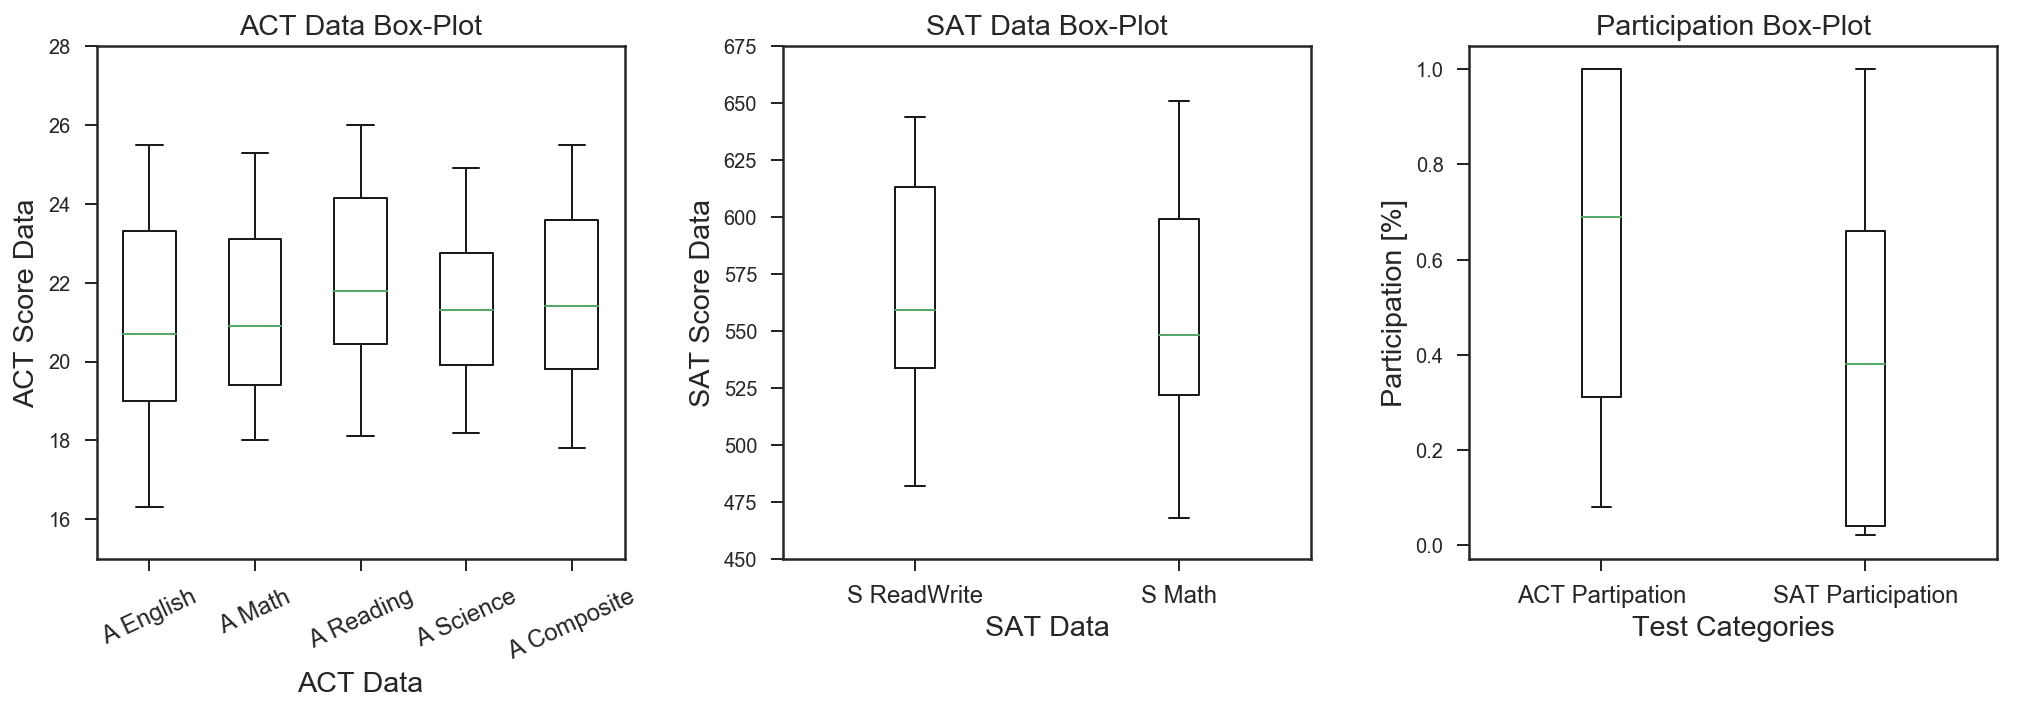

In [60]:
plt.figure(1)

plt.subplot(131)
plt.boxplot([merge_data_hist['ACT_English'],
             merge_data_hist['ACT_Math'],
            merge_data_hist['ACT_Reading'],
            merge_data_hist['ACT_Science'],
            merge_data_hist['ACT_Composite']],showfliers=True);
plt.xticks([1, 2, 3, 4, 5], ['A English', 'A Math', 'A Reading','A Science', 'A Composite'],fontsize='medium',
          rotation=25);
plt.xlabel('ACT Data',fontsize='large');
plt.ylabel('ACT Score Data',fontsize='large');
plt.ylim(15,28);
plt.title('ACT Data Box-Plot',fontsize='large');

plt.subplot(132)
plt.boxplot([merge_data_hist['SAT_ReadWrite'],
             merge_data_hist['SAT_Math']],showfliers=True);
plt.xticks([1, 2], ['S ReadWrite', 'S Math'],fontsize='medium');
plt.xlabel('SAT Data',fontsize='large');
plt.ylabel('SAT Score Data',fontsize='large');
plt.ylim(450,675);
plt.title('SAT Data Box-Plot',fontsize='large');

plt.subplot(133)
plt.boxplot([merge_data_hist['ACT_Participation'],
             merge_data_hist['SAT_Participation']],showfliers=True);
plt.xticks([1, 2], ['ACT Partipation', 'SAT Participation'],fontsize='medium');
plt.xlabel('Test Categories',fontsize='large');
plt.ylabel('Participation [%]',fontsize='large');
# plt.ylim(15,28);
plt.title('Participation Box-Plot',fontsize='large');

plt.subplots_adjust(top=0.9, 
                    bottom=.01, 
                    left=.2, 
                    right=2.4, 
                    hspace=.8,
                    wspace=0.3)


## Descriptive and Inferential Statistics

In [63]:
import scipy.stats as stats

##### Summarizing each distribution. 

In [339]:
def summary_stats(column,series):
    mean = np.mean(series)
    median = np.median(series)
    mode = stats.mode(series)[0][0]
    var = np.var(series)
    std = np.std(series)
    print(column.upper())
    if mean < median:
        print('NEGATIVE SKEW')
    elif mean > median:
        print('POSITIVE SKEW')
    else:
        print('SYMETRIC')
    return('mean = {}, median = {}, mode = {}, var = {}, std = {}'.format(np.around(mean,3),
                                                                          np.around(median,3),
                                                                          np.around(mode,3),
                                                                          np.around(var,3),
                                                                          np.around(std,3)))

In [340]:
#SAT Participation
print(summary_stats('SAT_Participation',merge_data_hist['SAT_Participation']))
print('-'*50)
print(summary_stats('SAT_ReadWrite',merge_data_hist['SAT_ReadWrite']))
print('-'*50)
print(summary_stats('SAT_Math',merge_data_hist['SAT_Math']))
print('-'*50)
print(summary_stats('SAT_Total',merge_data_hist['SAT_Total']))
print('-'*50)
print(summary_stats('ACT_Participation',merge_data_hist['ACT_Participation']))
print('-'*50)
print(summary_stats('ACT_English',merge_data_hist['ACT_English']))
print('-'*50)
print(summary_stats('ACT_Math',merge_data_hist['ACT_Math']))
print('-'*50)
print(summary_stats('ACT_Reading',merge_data_hist['ACT_Reading']))
print('-'*50)
print(summary_stats('ACT_Science',merge_data_hist['ACT_Science']))
print('-'*50)
print(summary_stats('ACT_Composite',merge_data_hist['ACT_Composite']))


SAT_PARTICIPATION
POSITIVE SKEW
mean = 0.398, median = 0.38, mode = 0.03, var = 0.122, std = 0.349
--------------------------------------------------
SAT_READWRITE
POSITIVE SKEW
mean = 569.118, median = 559.0, mode = 513.0, var = 2044.574, std = 45.217
--------------------------------------------------
SAT_MATH
NEGATIVE SKEW
mean = 547.627, median = 548.0, mode = 524.0, var = 7068.195, std = 84.073
--------------------------------------------------
SAT_TOTAL
POSITIVE SKEW
mean = 1126.098, median = 1107.0, mode = 1005.0, var = 8387.539, std = 91.584
--------------------------------------------------
ACT_PARTICIPATION
NEGATIVE SKEW
mean = 0.653, median = 0.69, mode = 1.0, var = 0.101, std = 0.318
--------------------------------------------------
ACT_ENGLISH
POSITIVE SKEW
mean = 20.931, median = 20.7, mode = 19.0, var = 5.431, std = 2.33
--------------------------------------------------
ACT_MATH
POSITIVE SKEW
mean = 21.182, median = 20.9, mode = 19.4, var = 3.851, std = 1.962
----------

#####  Executing a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [90]:
# p-value is < 0.05 so H0 in rejected and the alternate hypthesis is true
# Ho: muSAT = muACT 
# Ha: muSAT != muACT
stats.ttest_ind(merge_data_hist['SAT_Participation'], merge_data_hist['ACT_Participation'])

Ttest_indResult(statistic=-3.8085778908170544, pvalue=0.00024134203698662353)

> p-value < 0.05 so we reject Ho and confirm that Ha is true

##### Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [341]:
def conf(data,column,confid):   
    sample_mean = data[column].mean()
    z_star = stats.norm.ppf(confid)
    sigma = data[column].std()
    n = data[column].count()
    low_end = sample_mean - z_star * sigma
    high_end = sample_mean + z_star * sigma
    return (sample_mean,low_end, high_end)

In [342]:
#SAT Participation confidence intervals
conf(merge_data_hist,'SAT_Participation',0.95)

(0.3980392156862746, -0.18220974967336828, 0.9782881810459174)

>95% confident that the mean of 0.398 is between -0.18 and 0.97

In [343]:
#ACT Participation confidence intervals
conf(merge_data_hist,'ACT_Participation',0.95)

(0.6525490196078432, 0.12387921397678603, 1.1812188252389002)

>95% confident that the mean of 0.652 is between 0.652 and 1.18

##### SAT vs ACT Math correlation

In [344]:
# There is a weak correlation of -0.34
print(np.corrcoef(merge_data_hist['SAT_Math'], merge_data_hist['ACT_Math']))

[[ 1.        -0.3409059]
 [-0.3409059  1.       ]]


According to the data there is a correlation coefficient -0.34 Meaning that for a 0.34 point drop in ACT score there is a 1 point SAT increase. It does suggest that ACT Math portion does not prepare student for the SAT test or that the SAT test appears to be more rigorous.  